In [10]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import SGD
from keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
from keras.utils.np_utils import to_categorical

batch_size = 128
num_classes = 10
epochs = 30

# input image dimensions
img_rows, img_cols = 28,28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [11]:
# Get the number of image in training set and test set
x_train[0].shape, x_test.shape[0]
# Get the first image from test set
print(y_test[0])
# This is number 7

7


In [12]:
# Vectorization
x_train = x_train.reshape(-1, 784) # N
x_test = x_test.reshape(-1, 784)

# Change type of dataset to float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# normalize (0-1)
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [13]:
# convert class vectors to binary class matrices
# Change the number of output to one-hot coding in both training and test set
# Depend on the number of label 

# Before one hot coding
print(y_train[0])
# After one hot coding output train và output test
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
 
print(y_train[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [14]:
model = Sequential()
# input_shape
model.add(Dense(100, activation='relu', input_shape=(784,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_4 (Dense)              (None, 32)                3232      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                330       
Total params: 82,062
Trainable params: 82,062
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [16]:
H = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/30
469/469 [==============================] - 5s 4ms/step - loss: 0.3771 - accuracy: 0.8947 - val_loss: 0.1887 - val_accuracy: 0.9436
Epoch 2/30
469/469 [==============================] - 2s 4ms/step - loss: 0.1619 - accuracy: 0.9528 - val_loss: 0.1332 - val_accuracy: 0.9612
Epoch 3/30
469/469 [==============================] - 2s 4ms/step - loss: 0.1150 - accuracy: 0.9661 - val_loss: 0.1023 - val_accuracy: 0.9684
Epoch 4/30
469/469 [==============================] - 2s 4ms/step - loss: 0.0901 - accuracy: 0.9723 - val_loss: 0.0971 - val_accuracy: 0.9697
Epoch 5/30
469/469 [==============================] - 2s 4ms/step - loss: 0.0723 - accuracy: 0.9788 - val_loss: 0.0903 - val_accuracy: 0.9708
Epoch 6/30
469/469 [==============================] - 2s 4ms/step - loss: 0.0593 - accuracy: 0.9821 - val_loss: 0.0848 - val_accuracy: 0.9718
Epoch 7/30
469/469 [==============================] - 2s 4ms/step - loss: 0.0515 - accuracy: 0.9841 - val_loss: 0.0790 - val_accuracy: 0.9740
Epoch 

In [17]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.1097438633441925
Test accuracy: 0.9779000282287598


The predicted:  4


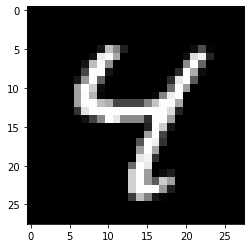

In [18]:
plt.imshow(x_test[6].reshape(28,28), cmap='gray')

y_predict = model.predict(x_test[6].reshape((1,784)))
print('The predicted: ', np.argmax(y_predict))